<a href="https://colab.research.google.com/github/Jalalbaim/IT-RAINS-DOGS-AND-CATS/blob/main/It_rains_dogs%26cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IT RAINS DOGS AND CATS**
***


## **Importing Dataset**

In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od
import os
#d4e1456f66ac2f1379f227353e8a10fc
od.download("https://www.kaggle.com/datasets/d4rklucif3r/cat-and-dogs")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohamedjalalbaim
Your Kaggle Key: ··········


100%|██████████| 218M/218M [00:02<00:00, 78.4MB/s]


## **Discovering Dataset**

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras

In [6]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.7, 1.5),
    zoom_range=[0.95, 1.05]
)

In [7]:
# Train data
train_path = '/content/cat-and-dogs/dataset/training_set'
train_data = datagen.flow_from_directory(
    train_path,
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 8000 images belonging to 2 classes.


In [8]:
# Test data
test_path = '/content/cat-and-dogs/dataset/test_set'
datagen_test=ImageDataGenerator(rescale=1.0/255.0)
test_data = datagen_test.flow_from_directory(
    test_path,
    shuffle = False,
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 2000 images belonging to 2 classes.


(32, 224, 224, 3)


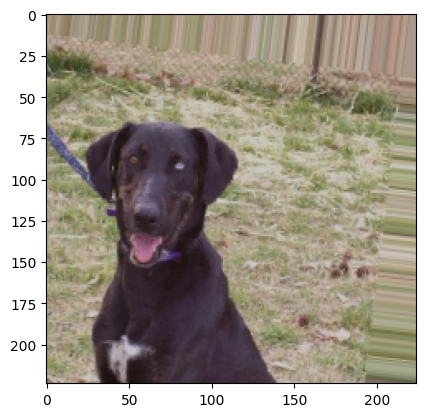

(32, 224, 224, 3)


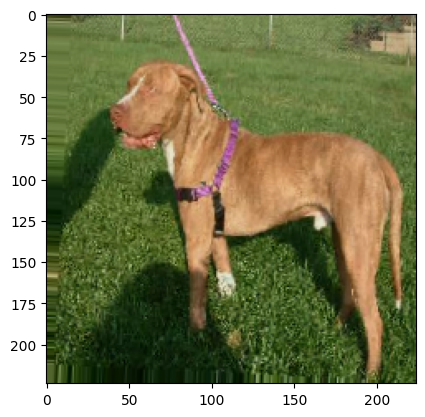

(32, 224, 224, 3)


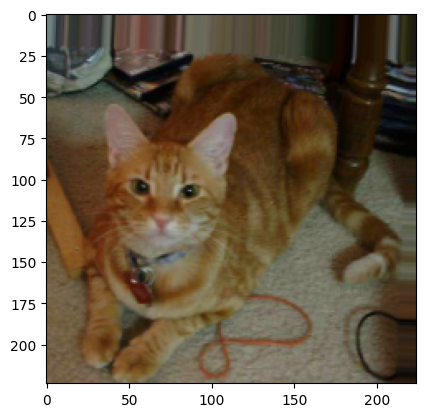

(32, 224, 224, 3)


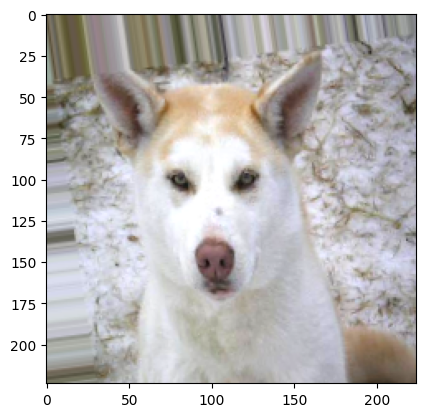

(32, 224, 224, 3)


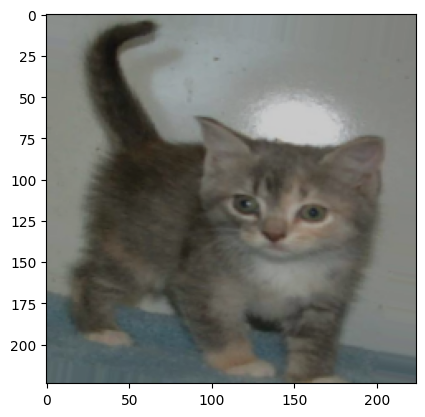

In [9]:
# Discovering Datasets
batch_size = 32
for i in range(5):
    img, labels = train_data.next()
    if img.shape[0] == 32:
        print(img.shape)
        plt.imshow(np.squeeze(img[i]))
        plt.show()

## **Let's build our model**

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# feature extractor
# We ll be use transfer learning, feature extractore using VGG16
base_model = tf.keras.applications. VGG16(
      weights='imagenet',
      include_top=False,
      input_shape=(224, 224, 3))

def feature_extractor(inputs):
  feature_extractor = base_model(inputs)
  return feature_extractor


58889256/58889256 [==============================] - 0s 0us/step


In [12]:
# build layers

def dense_layers(features):

  x = tf.keras.layers.Flatten()(features)
  x = tf.keras.layers.Dense(256, activation='relu')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Dropout(0.5)(x)

  return x

In [13]:
# classifier

def classifier(x):
  classification = tf.keras.layers.Dense(2, activation='sigmoid', name='classifier')(x)
  return classification

In [14]:
# model classification

def model_classification(inputs):

  features = feature_extractor(inputs)
  out_dense = dense_layers(features)
  output = classifier(out_dense)
  # model
  model = tf.keras.Model(inputs = inputs, outputs = output)

  return model


In [15]:
# Compile model
from tensorflow.keras.optimizers import Adam
def compile():
  inputs = tf.keras.layers.Input(shape = (224, 224,3))
  model = model_classification(inputs)
  model.compile(
      optimizer = Adam(lr=0.001),
      loss = 'binary_crossentropy',
      metrics = ['accuracy']
  )

  return model

In [16]:
# Model
for layer in base_model.layers:
    layer.trainable = False

model = compile()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                             

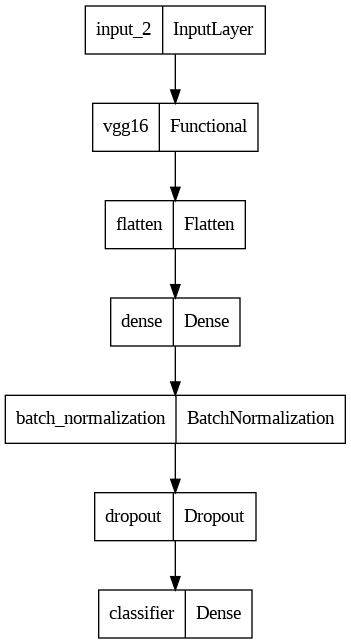

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import plot_model

plot_model(model)

## Train The Model
***

In [18]:
history = model.fit(train_data, epochs= 20,steps_per_epoch=200, validation_data= test_data )

Epoch 1/20
200/200 [==============================] - 129s 561ms/step - loss: 0.3230 - accuracy: 0.8677 - val_loss: 0.2112 - val_accuracy: 0.9150
Epoch 2/20
200/200 [==============================] - 106s 526ms/step - loss: 0.2352 - accuracy: 0.9056 - val_loss: 0.1853 - val_accuracy: 0.9280
Epoch 3/20
200/200 [==============================] - 107s 534ms/step - loss: 0.2086 - accuracy: 0.9119 - val_loss: 0.2161 - val_accuracy: 0.9105
Epoch 4/20
200/200 [==============================] - 107s 535ms/step - loss: 0.2038 - accuracy: 0.9152 - val_loss: 0.2089 - val_accuracy: 0.9175
Epoch 5/20
200/200 [==============================] - 105s 527ms/step - loss: 0.2069 - accuracy: 0.9167 - val_loss: 0.1835 - val_accuracy: 0.9220
Epoch 6/20
200/200 [==============================] - 106s 529ms/step - loss: 0.1839 - accuracy: 0.9237 - val_loss: 0.2236 - val_accuracy: 0.9085
Epoch 7/20
200/200 [==============================] - 105s 525ms/step - loss: 0.1810 - accuracy: 0.9266 - val_loss: 0.1819 -

Text(0, 0.5, 'Accuracy')

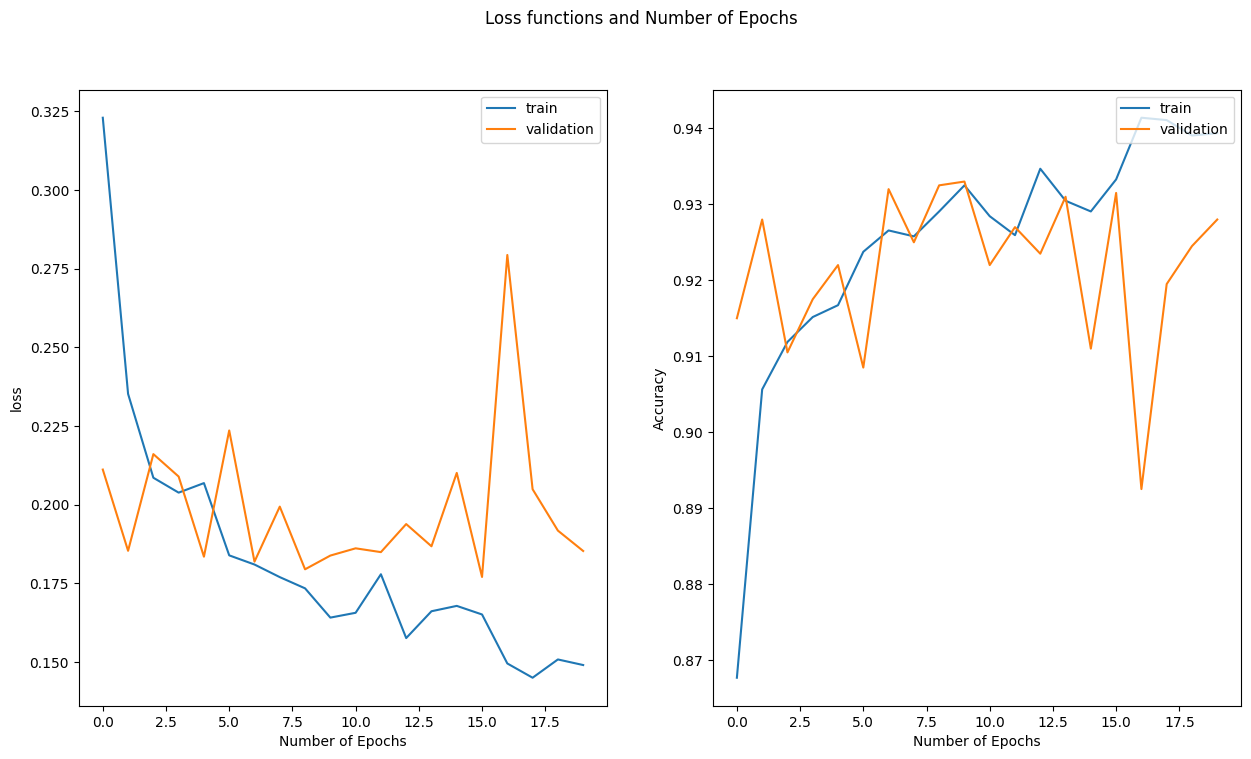

In [19]:
#Visualizing the loss parameters

fig, axs = plt.subplots(1,2, figsize=(15, 8))
plt.suptitle('Loss functions and Number of Epochs')
(ax1, ax2) = axs

#1st plot : loss vs epochs
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='validation')
ax1.legend(loc="upper right")
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('loss')

#2nd plot : accuracy vs epochs
ax2.plot(history.history['accuracy'], label='train')
ax2.plot(history.history['val_accuracy'], label='validation')
ax2.legend(loc="upper right")
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Accuracy')

## Classification report

In [20]:
from sklearn.metrics import classification_report,  confusion_matrix, f1_score
import seaborn as sns

In [21]:
#evaluating the model
loss, acc = model.evaluate(test_data)
print(loss)
print('')
print('The categorical accuracy or how often the predictions match the labels is ' + f'{acc*100:.{0}f}' + '%')
print('')
#getting predictions for futher evaluation
preds = model.predict(test_data)
preds = np.argmax(preds, axis=1)
#looking at the values that were predicted and the true values
print('The predicted values are:')
print(preds)
print('')
print('The actual values are:')
print(test_data.classes)
print('')
print('Classification Report:')
print(classification_report(test_data.classes, preds, labels=[0,1,2]))

63/63 [==============================] - 9s 138ms/step - loss: 0.1853 - accuracy: 0.9280
0.1852918118238449

The categorical accuracy or how often the predictions match the labels is 93%

63/63 [==============================] - 9s 135ms/step
The predicted values are:
[0 1 0 ... 0 0 1]

The actual values are:
[0 0 0 ... 1 1 1]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1000
           1       0.91      0.95      0.93      1000
           2       0.00      0.00      0.00         0

   micro avg       0.93      0.93      0.93      2000
   macro avg       0.62      0.62      0.62      2000
weighted avg       0.93      0.93      0.93      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

## Confusion matrix

[Text(0, 0.5, 'dogs'), Text(0, 1.5, 'cats')]

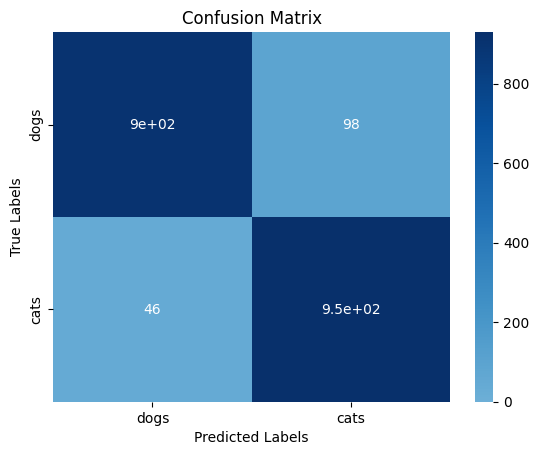

In [22]:
#creating confusion matrix plot with sns
cm=confusion_matrix(test_data.classes, preds)
ax = plt.subplot()
sns.heatmap(cm, vmin=0, vmax=9.3e+02, center=10, cmap=plt.cm.Blues, annot=True)
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['dogs', 'cats'])
ax.yaxis.set_ticklabels(['dogs', 'cats'])